In [134]:
# 3 types of regularization(adding some extra info to force the model to choose something that you want it to choose)
# i.e. you increate the bias by a little to reduce the variance a lot
# types:
# 1. Ridge (L2)
# 2. Lasso (L1)
# 3. Elastic Net

# regularization reduces the overfitting of the data
# do too much regularization and you may underfit the data

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [137]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [138]:
X = data.data
y = data.target

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 2)

In [140]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()
L.fit(X_train, y_train)

LinearRegression()

In [141]:
print(L.coef_)
print(L.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
151.88334520854633


In [142]:
y_pred = L.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


R2 score 0.4399387660024645
RMSE 55.62759745954073


In [143]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.01)
R.fit(X_train, y_train)

Ridge(alpha=0.01)

In [144]:
print(R.coef_)
print(R.intercept_)

[  -6.40108775 -198.66976733  522.04854822  336.34836277 -383.70918696
  152.66367825  -66.06058291   75.61108988  659.86940155   55.82812781]
151.89636450998918


In [145]:
y_pred1=R.predict(X_test)

print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.44394315312113164
RMSE 55.42837457148773


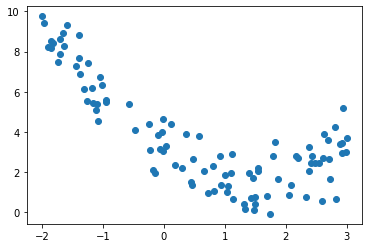

In [146]:

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

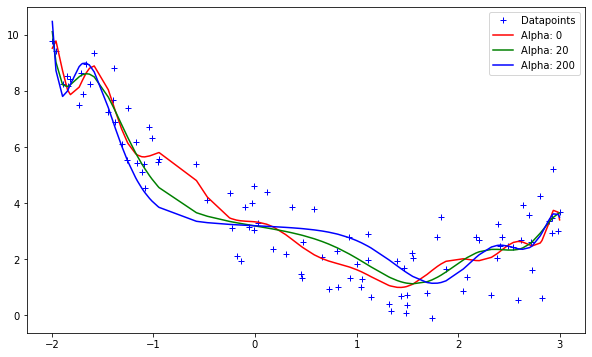

In [147]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()